In [39]:
import astropy.units as u
from astropy.constants import m_p, c, h, k_B
from scipy.integrate import trapz
import numpy as np
import matplotlib.pyplot as plt
import timeit
from pathlib import Path

In [40]:
from agnpy.spectra import PowerLaw as PWL
from agnpy.utils.conversion import nu_to_epsilon_prime, B_to_cgs
from agnpy.utils.math import axes_reshaper
from agnpy.photo_meson.kernels import phi_gamma
from agnpy.utils.math import axes_reshaper

In [41]:
# Constants
mpc2 = (m_p * c ** 2).to('eV')

In [57]:
# Reproduction of Fig. 13 Kelner & Aharonian 2008 (KA2008)

# Main quantities
eta = np.linspace(0.3443,31.3,200) #31.3
eta0 = 0.313

Ec = 3 * 1e20 * u.eV
Eg = 0.5 * Ec
Emax = 1e23 * u.eV
gamma_max = (Emax / mpc2).to_value("")
gamma_lim = (Eg / mpc2).to_value("") # it is the epsilon for photons
print(f"{gamma_lim:.2e}")
print(f"{gamma_max:.2e}")

1.60e+11
1.07e+14


In [43]:
# Freq of soft photons, they will be the gamma_p_min in the integration of H(eta,x)
gamma = np.logspace(np.log10(gamma_lim), np.log10(gamma_max), 200) # Gamma of the output particle, for photons it is epsilon

In [44]:
# Proton distribution with alpha = 2
k1 = 1 * u.eV
#k1 = 1e5 * u.Unit("cm-3")
p = 2.0

n_p = PWL(k = k1, 
          p = p, 
          gamma_min = 1,
          gamma_max = 1e15, 
          mass = m_p)

In [45]:
# Proton distribution with alpha = 2.5
k2 = 5e5 * u.eV
#k1 = 1e5 * u.Unit("cm-3")
p2 = 2.5

n_p2 = PWL(k = k2, 
          p = p2, 
          gamma_min = 1,
          gamma_max = 1e15, 
          mass = m_p)

In [46]:
# Soft photon distribution: Black Body
def BlackBody(epsilon):
    T = 2.7 * u.K
    kT = (k_B * T).to('eV').value
    c1 = c.to('cm s-1').value
    h1 = h.to('eV s').value
    norm = 8 * np.pi / (h1 ** 3 * c1 ** 3)
    num = (mpc2.value * epsilon) ** 2
    denom = np.exp(mpc2.value * epsilon / kT) - 1
    
    return norm * (num / denom) * u.Unit('cm-3')

In [53]:
# Conversion of variables in Eq. 70 into log
y = np.log10(gamma)
y_lim = np.log10(gamma_lim)
y_max = np.log10(gamma_max)

_y, _eta = axes_reshaper(y, eta)

print(y.shape)
print(_y.shape)
print(_eta.shape)

# print(y)
# # print(_y)
# # print(_eta)# 

(200,)
(200, 1)
(1, 200)


In [55]:
print(y)

[11.20376246 11.21795296 11.23214345 11.24633395 11.26052445 11.27471494
 11.28890544 11.30309594 11.31728643 11.33147693 11.34566742 11.35985792
 11.37404842 11.38823891 11.40242941 11.4166199  11.4308104  11.4450009
 11.45919139 11.47338189 11.48757239 11.50176288 11.51595338 11.53014387
 11.54433437 11.55852487 11.57271536 11.58690586 11.60109636 11.61528685
 11.62947735 11.64366784 11.65785834 11.67204884 11.68623933 11.70042983
 11.71462032 11.72881082 11.74300132 11.75719181 11.77138231 11.78557281
 11.7997633  11.8139538  11.82814429 11.84233479 11.85652529 11.87071578
 11.88490628 11.89909678 11.91328727 11.92747777 11.94166826 11.95585876
 11.97004926 11.98423975 11.99843025 12.01262074 12.02681124 12.04100174
 12.05519223 12.06938273 12.08357323 12.09776372 12.11195422 12.12614471
 12.14033521 12.15452571 12.1687162  12.1829067  12.19709719 12.21128769
 12.22547819 12.23966868 12.25385918 12.26804968 12.28224017 12.29643067
 12.31062116 12.32481166 12.33900216 12.35319265 12.

In [56]:
print(_y)
print(_eta)

[[11.20376246]
 [11.21795296]
 [11.23214345]
 [11.24633395]
 [11.26052445]
 [11.27471494]
 [11.28890544]
 [11.30309594]
 [11.31728643]
 [11.33147693]
 [11.34566742]
 [11.35985792]
 [11.37404842]
 [11.38823891]
 [11.40242941]
 [11.4166199 ]
 [11.4308104 ]
 [11.4450009 ]
 [11.45919139]
 [11.47338189]
 [11.48757239]
 [11.50176288]
 [11.51595338]
 [11.53014387]
 [11.54433437]
 [11.55852487]
 [11.57271536]
 [11.58690586]
 [11.60109636]
 [11.61528685]
 [11.62947735]
 [11.64366784]
 [11.65785834]
 [11.67204884]
 [11.68623933]
 [11.70042983]
 [11.71462032]
 [11.72881082]
 [11.74300132]
 [11.75719181]
 [11.77138231]
 [11.78557281]
 [11.7997633 ]
 [11.8139538 ]
 [11.82814429]
 [11.84233479]
 [11.85652529]
 [11.87071578]
 [11.88490628]
 [11.89909678]
 [11.91328727]
 [11.92747777]
 [11.94166826]
 [11.95585876]
 [11.97004926]
 [11.98423975]
 [11.99843025]
 [12.01262074]
 [12.02681124]
 [12.04100174]
 [12.05519223]
 [12.06938273]
 [12.08357323]
 [12.09776372]
 [12.11195422]
 [12.12614471]
 [12.14033

(200, 200)
(200, 200)


/Users/ilaria/Desktop/Dottorato_data/AGNpy/agnpy_github2/agnpy/agnpy/photo_meson/kernels.py:108: RuntimeWarning: invalid value encountered in power
  _exp = np.exp(- s * (np.log(x / x_minus))**delta)
/Users/ilaria/Desktop/Dottorato_data/AGNpy/agnpy_github2/agnpy/agnpy/photo_meson/kernels.py:112: RuntimeWarning: invalid value encountered in power
  B * _exp * _log ** psi,


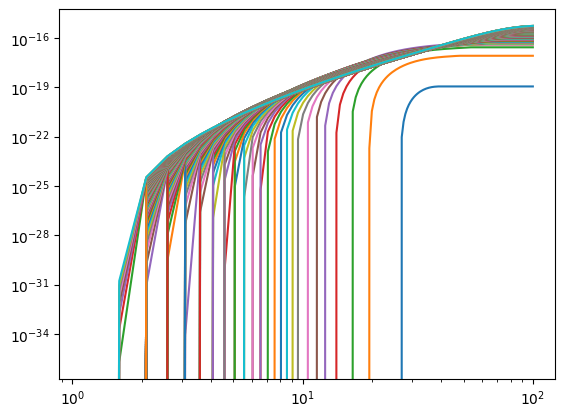

In [58]:
fp_log = n_p(10 ** _y).value
fph_log = BlackBody(_eta / (4 * 10 ** _y)).value
phig_log = phi_gamma(_eta, 10 ** y_lim/ 10 ** _y)

phig_test = phi_gamma(_eta, 10 ** y_lim/ 10 ** _y)

print(phig_log.shape)
print(phig_test.shape)

fp2_log = n_p2(10 ** _y).value

plt.loglog(eta/eta0, phig_log)

(200, 200)
(200, 200)


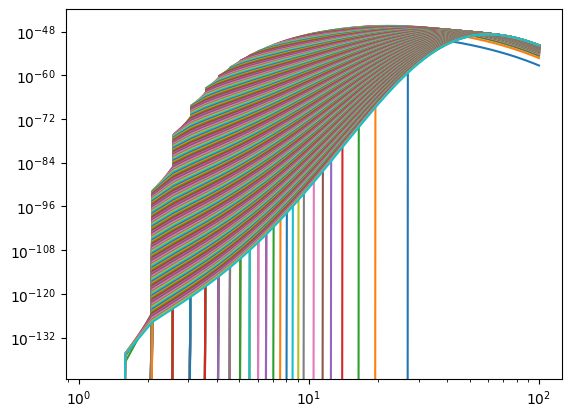

In [59]:
# H integrand in log (from Eq. 70 KA2008)
H_integrand_log = (10 ** (-_y)) * fp_log * \
                 fph_log * \
                 phig_log * \
                 np.log(10)

H_integrand_log2 = (10 ** (-_y)) * fp2_log * \
                 fph_log * \
                 phig_log * \
                 np.log(10)

print(phig_log.shape)
print(H_integrand_log.shape)

plt.loglog(eta / eta0, H_integrand_log)

(200,)


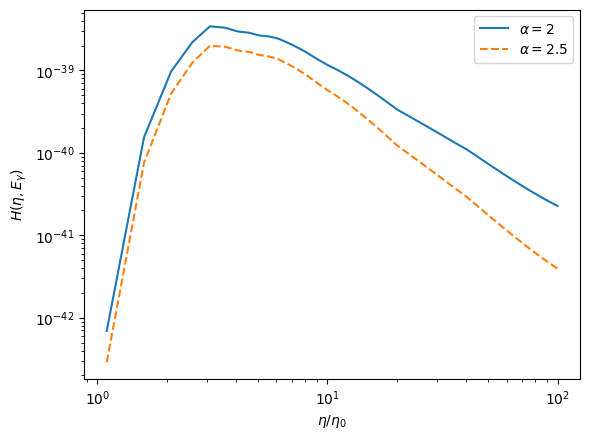

In [38]:
# Integrate H over gamma in log (= integrate over y)
H_log = (1 / 4) * (mpc2.value) * np.trapz(H_integrand_log, _y, axis=0)
H_log2 = (1 / 4) * (mpc2.value) * np.trapz(H_integrand_log2, _y, axis=0)

print(H_log.shape)

plt.loglog(eta / eta0, H_log, label = r'$\alpha = 2$')
plt.loglog(eta / eta0, H_log2, ls = '--', label = r'$\alpha = 2.5$')
plt.xlabel(r'$\eta / \eta_0$')
plt.ylabel(r'$H(\eta, E_\gamma)$')
plt.legend(loc = 'best')

In [13]:
# Plot phi_gamma as function of gamma (not in log)
_gamma, _eta = axes_reshaper(gamma, eta)

phi_g = phi_gamma(_eta, (gamma_lim/_gamma))

#plt.loglog(eta / eta0, phi_g)

In [14]:
# Integrand of H from Eq. 70 KA2008 as function of gamma instead of E 
H_integrand = (1 / _gamma ** 2) * n_p(_gamma).value * \
                 BlackBody(_eta / (4 * _gamma)) * \
                 phi_gamma(_eta, (gamma_lim/_gamma)) 

#plt.loglog(eta / eta0, H_integrand)

Text(0, 0.5, '$H(\\eta, E_\\gamma)$')

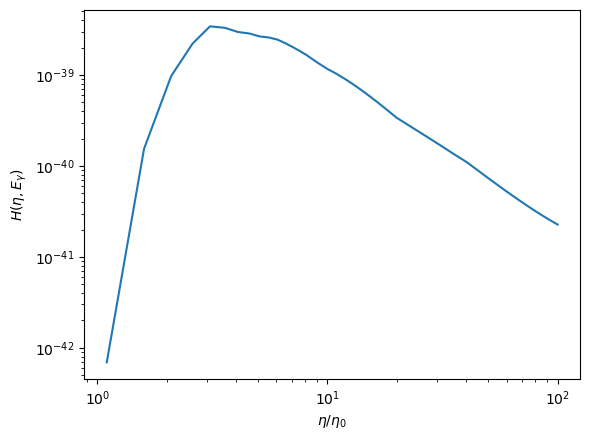

In [15]:
# Integration of H_integrand over gamma (from gamma_lim to gamma_max)
H = (1 / 4) * (mpc2.value) * np.trapz(H_integrand, gamma, axis=0)

plt.loglog(eta / eta0, H)
plt.xlabel(r'$\eta / \eta_0$')
plt.ylabel(r'$H(\eta, E_\gamma)$')

In [16]:
# Try different gamma_p arrays to understand error
gamma_p = np.logspace(1,15,200)
y_p = np.log10(gamma_p)
_y_p, _eta = axes_reshaper(y_p, eta)


/var/folders/tq/h7xcx4j11hb1x5f6fcq_5pdh0000gn/T/ipykernel_41536/3893270798.py:9: RuntimeWarning: overflow encountered in exp
  denom = np.exp(mpc2.value * epsilon / kT) - 1


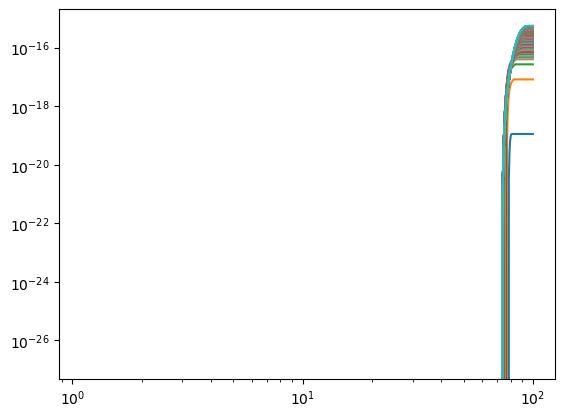

In [17]:
fp_log_gp = n_p(10 ** _y_p).value
fph_log_gp = BlackBody(_eta / (4 * 10 ** _y_p)).value
phig_log_gp = phi_gamma(_eta, 10 ** y_lim/ 10 ** _y_p)

plt.loglog(eta / eta0, phig_log_gp)
#plt.xlim(6.5e1, 1e2)

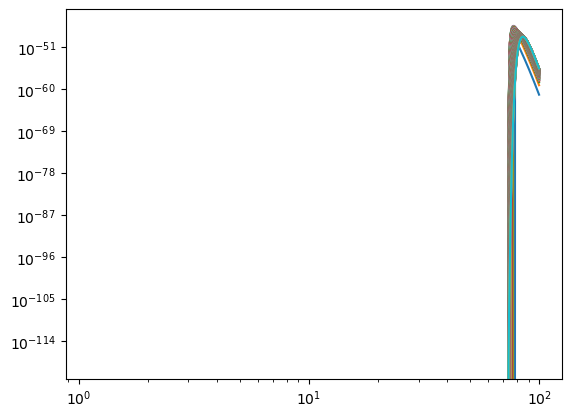

In [18]:
H_int_log_gp = (10 ** (-_y_p)) * fp_log_gp * \
                 fph_log_gp * \
                 phig_log_gp * \
                 np.log(10)

plt.loglog(eta / eta0, H_int_log_gp)
#

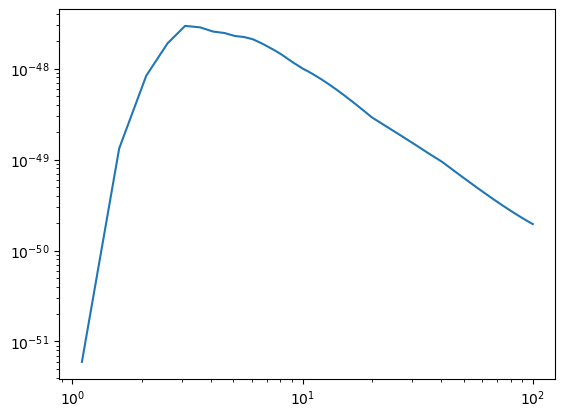

In [19]:
H_log_gp = np.trapz(H_int_log_gp, _y, axis=0)

plt.loglog(eta / eta0, H_log_gp)

/var/folders/tq/h7xcx4j11hb1x5f6fcq_5pdh0000gn/T/ipykernel_41536/3893270798.py:9: RuntimeWarning: overflow encountered in exp
  denom = np.exp(mpc2.value * epsilon / kT) - 1


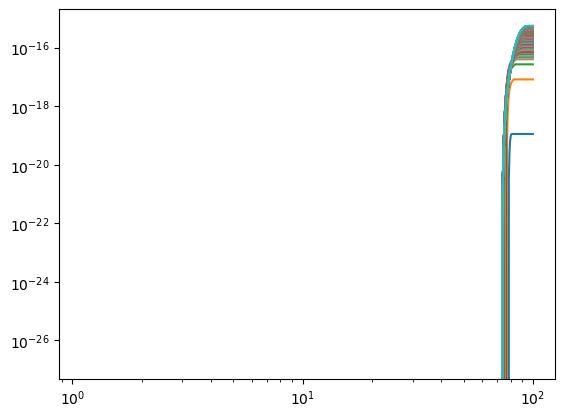

In [20]:
# Same as before but not in log
_gamma_p, _eta = axes_reshaper(gamma_p, eta)

fp_gp = n_p(_gamma_p).value
fph_gp = BlackBody(_eta / (4 * _gamma_p)).value
phig_gp = phi_gamma(_eta, (gamma_lim/_gamma_p))

plt.loglog(eta / eta0, phig_gp)
#plt.xlim(6.5e1, 1e2)

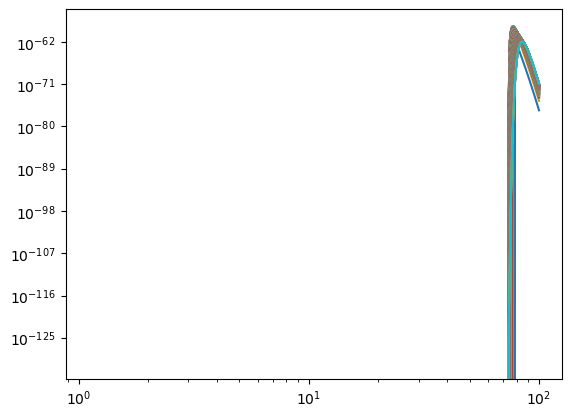

In [21]:
H_int_gp = (1 / _gamma_p ** 2) * fp_gp * \
                 fph_gp * \
                 phig_gp

plt.loglog(eta / eta0, H_int_gp)
#plt.xlim(6.5e1, 1e2)

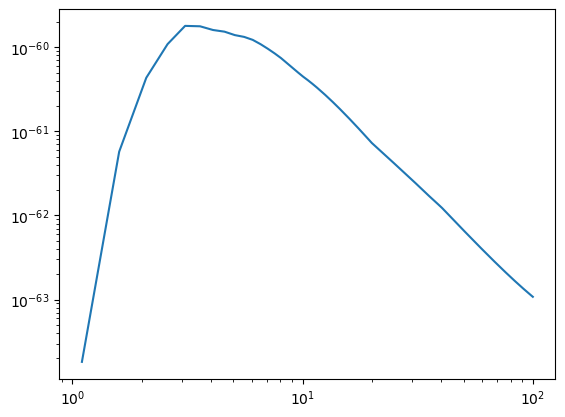

In [22]:
H_gp = np.trapz(H_int_gp, _y, axis=0)

plt.loglog(eta / eta0, H_gp)

In [23]:
#gamma_x, gamma_y = np.meshgrid(gamma, gamma)